___

<a href='https://github.com/ai-vithink'> <img src='https://avatars1.githubusercontent.com/u/41588940?s=200&v=4' /></a>
___

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')
# To hide warnings, which won't change the desired outcome.

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines 

In [4]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [5]:
iris = sns.load_dataset('iris')

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# To check unique values in species section we have 
iris['species'].unique()
# Other 4 columns are just different measurements of the flowers menotioned below.

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

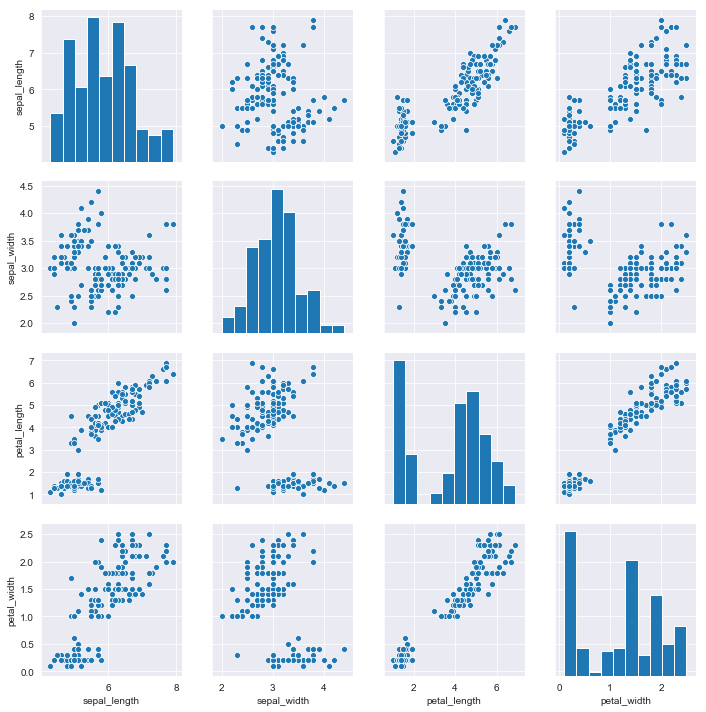

In [8]:
 sns.pairplot(iris) # Automated joint plot for the entire dataset.

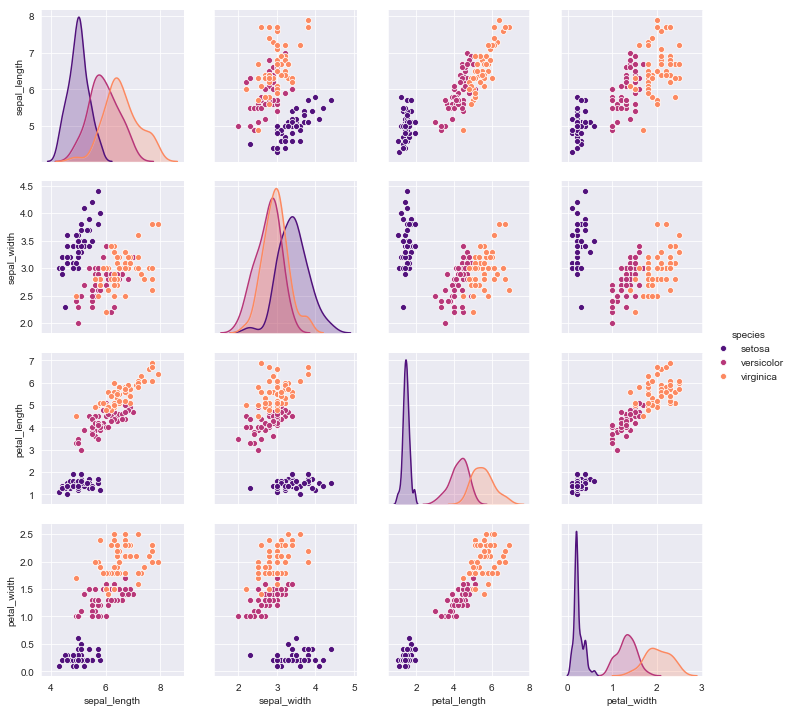

In [9]:
sns.pairplot(iris,hue='species',palette='magma')

## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

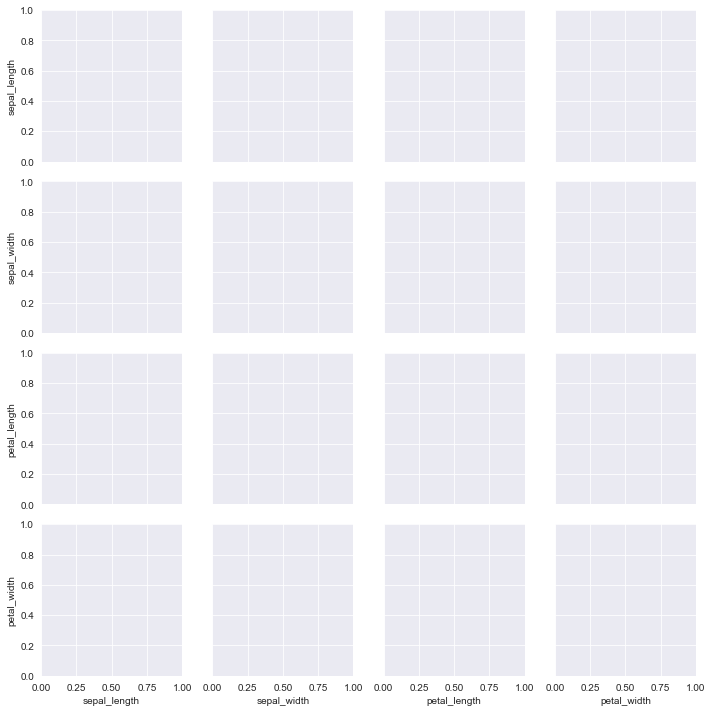

In [10]:
# Using seaborn's pair grid mechanism we will actually customise the pairplot for more control.
sns.PairGrid(iris) # Takes all the numerical columns and grids them up.
# Make the grid

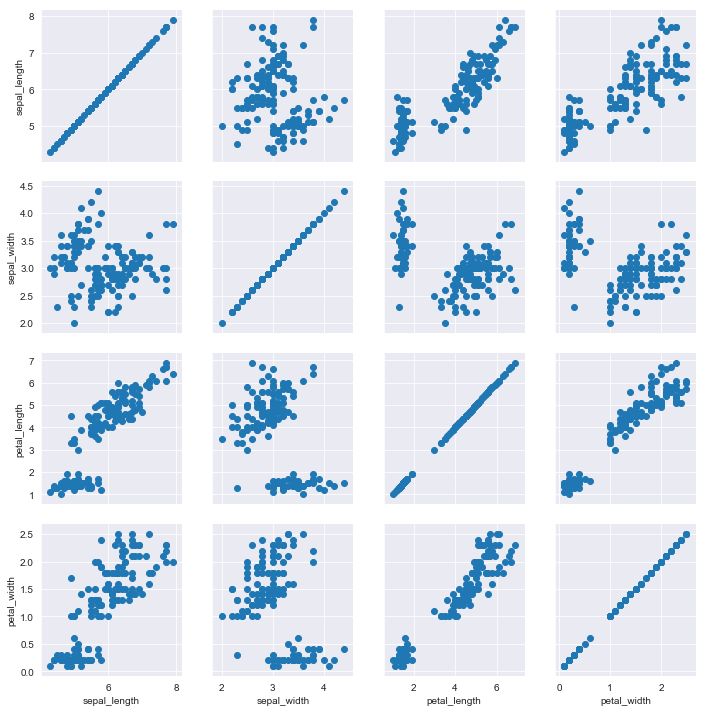

In [11]:
# Then you map to the grid
# Main way is to set PairGrid equal to a variable and off of that variable we can map the plot type. Say for scatter plot
g = sns.PairGrid(iris)
g.map(plt.scatter)  # Maps a scatterplot to the entire grid

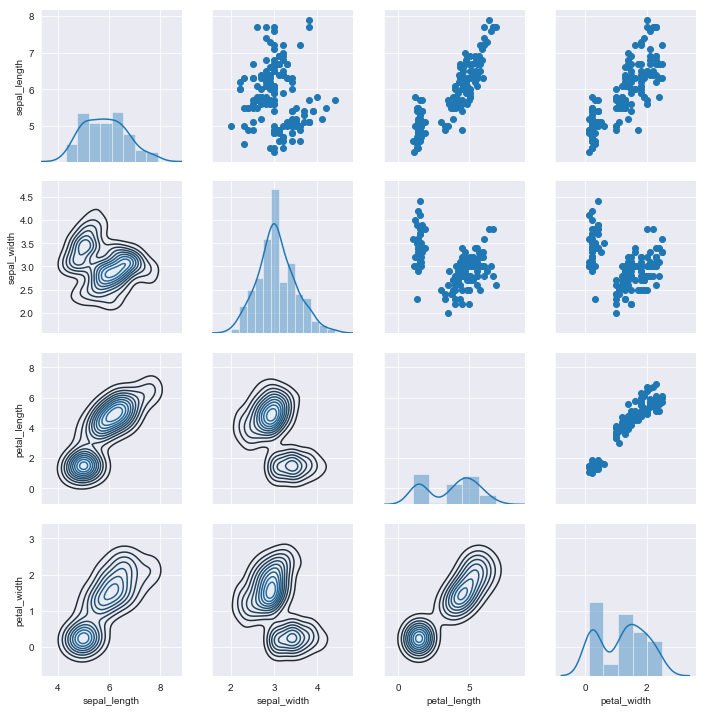

In [12]:
# To specify what we want exactly on diagonal upper and lower half 
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [13]:
tips = sns.load_dataset('tips')

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

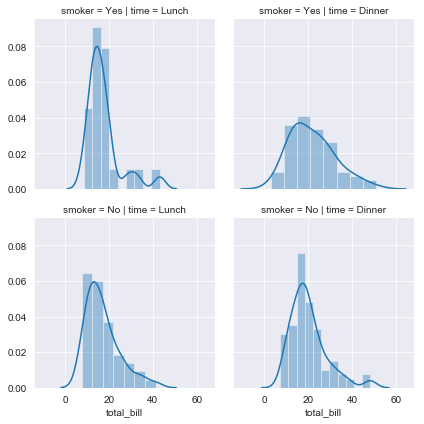

In [15]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')
# Gives us an empty grid, and we can begin to actually map plot types to this grid.
# We are mapping a plot type, and separating the results based on column and row. X-axis is total bill and are 4 separate plots.
# Yes or NO smoker is in row, and actual time of lunch vs dinner is specified by column. Lunch on left and dinner on right.
# Top row smokers and bottom row is non smokers.

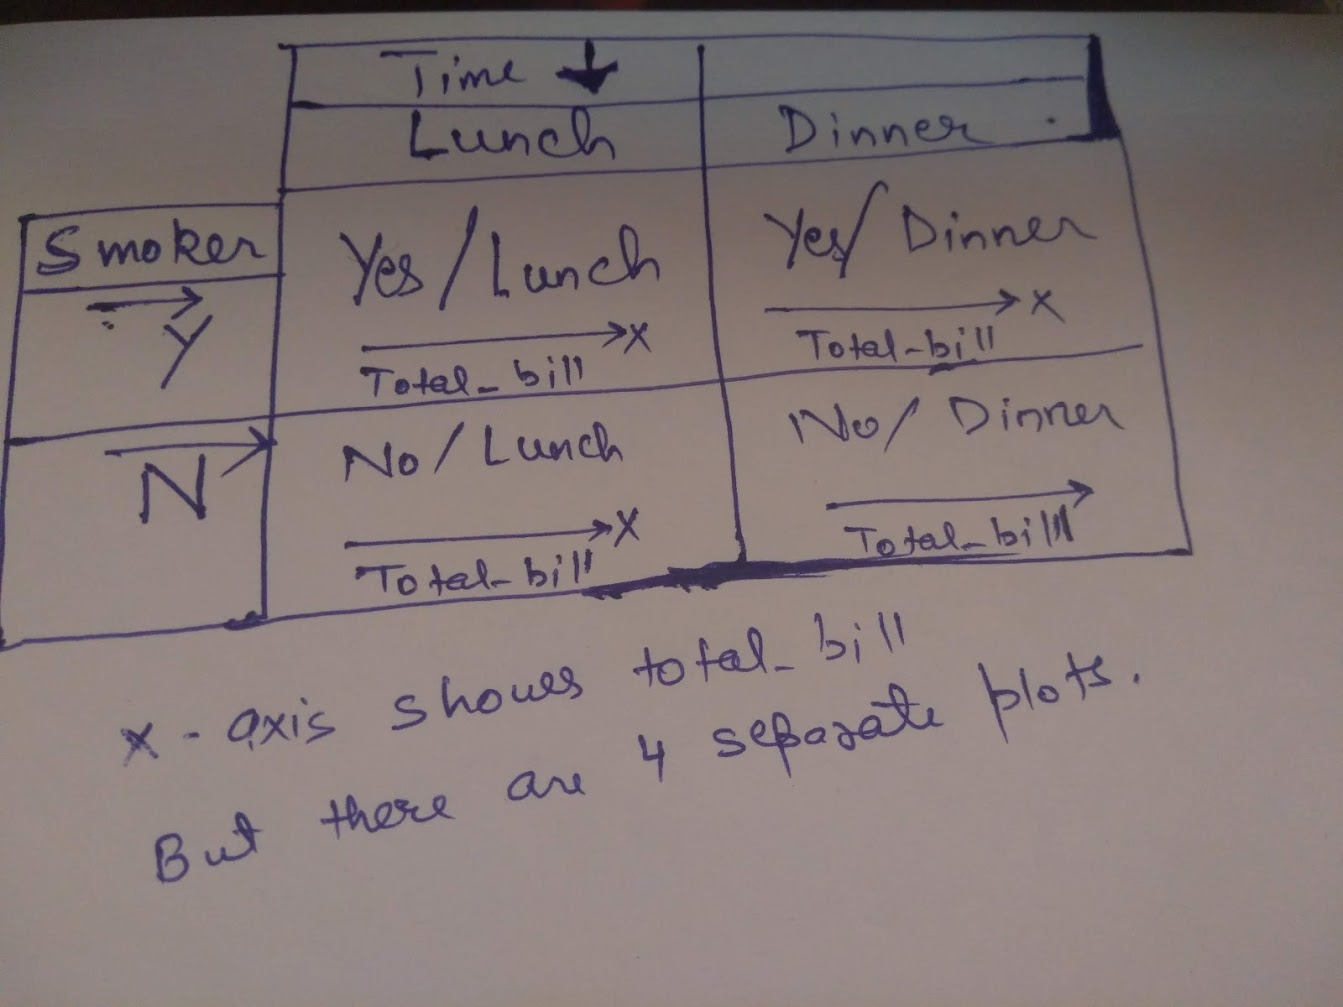

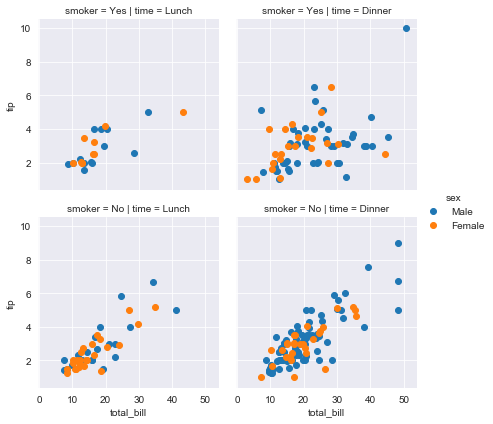

In [16]:
# If we try to map a plot type which needs more than one argument then it throws an error
g = sns.FacetGrid(data=tips,col='time',row="smoker",hue='sex')
g.map(plt.scatter,'total_bill','tip').add_legend()
# What we get is tip vs total_bill and separated by row and column of smoker and lunch dinner.
# g.map(plt.scatter,'total_bill') #Error

* If we are dealing with a plot type which needs more than one argument then we just have to add it as second argument in the map.
* We are not covering much for grid as number of times we will be needing facetgrid is very less.
* Seaborn's plotting capabilities are actually more than enough for us throughout the course. Grid functions are only there if we want to customise the plots even further.

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

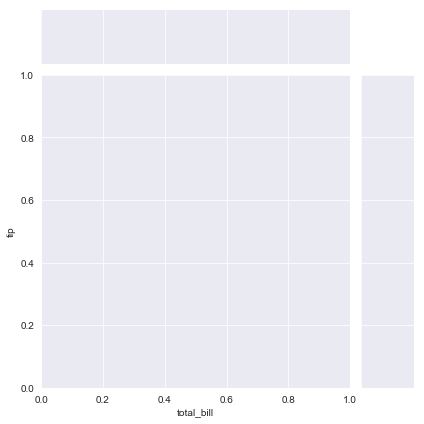

In [17]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

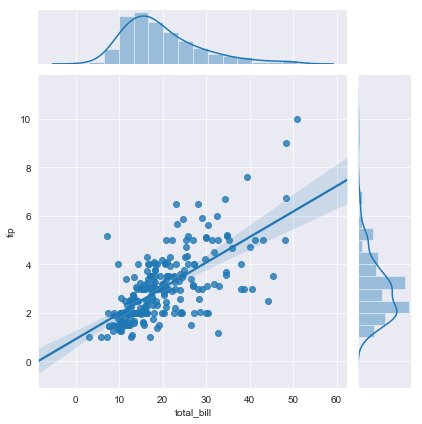

In [18]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

Reference the documentation as necessary for grid types, but most of the time you'll just use the easier plots discussed earlier.
# Great Job!